In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
from numpy import random
%matplotlib inline

In [84]:
print('Python version' + sys.version)
print('Pandas version' + pd.__version__)
print('MatplotLib version' + matplotlib.__version__)

Python version3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 07:29:16) [MSC v.1900 32 bit (Intel)]
Pandas version0.20.3
MatplotLib version2.1.0


In [85]:
np.random.seed(111)

# Function to generate test data
def creat_data_set(number=1):
    output=[]
    for i in range(number):
        rng = pd.date_range(start='1/1/2009', end='12/21/2012', freq='W-MON')
        data = random.randint(low=25, high=1000, size=len(rng))
        status = [1,2,3]
        random_status = [status[random.randint(low=0, high=len(status))] for i in range(len(rng))]
        states = ['GA', 'FL', 'fl', 'NY', 'NJ', 'TX']
        random_states = [states[random.randint(low=0, high=len(states))] for i in range(len(rng))]
        output.extend(zip(random_states, random_status, data, rng))
    return output



In [86]:
dataset = creat_data_set(4)
df = pd.DataFrame(data=dataset, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
State            828 non-null object
Status           828 non-null int64
CustomerCount    828 non-null int64
StatusDate       828 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 22.7+ KB


In [87]:
df.head()

,State,Status,CustomerCount,StatusDate
0,NY,1,877,2009-01-05
1,TX,1,901,2009-01-12
2,FL,1,749,2009-01-19
3,GA,3,111,2009-01-26
4,FL,3,300,2009-02-02


In [88]:
rng = pd.date_range(start='1/1/2009', end='12/21/2012', freq='W-MON')

In [89]:
rng[:3]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19'], dtype='datetime64[ns]', freq='W-MON')

In [90]:
pd.date_range?

In [91]:
type(rng)

pandas.core.indexes.datetimes.DatetimeIndex

In [92]:
data = random.randint(low=25, high=1000, size=len(rng))

In [93]:
type(data)

numpy.ndarray

In [94]:
status = [1,2,3]

In [95]:
random_status = [status[random.randint(low=0, high=len(status))] for i in range(len(rng))]

In [96]:
type(random_status)

list

In [97]:
len(random_status) == len(rng)

True

In [98]:
list.extend?

In [99]:
df.to_excel('Lesson3.xlsx', index=False)
print('Done')

Done


In [100]:
pd.read_excel?

In [101]:
location = r'd:/code/jupyter/HEDARO/Lesson3.xlsx'

In [102]:
df = pd.read_excel(location, 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [103]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-15', '2012-10-22', '2012-10-29', '2012-11-05',
               '2012-11-12', '2012-11-19', '2012-11-26', '2012-12-03',
               '2012-12-10', '2012-12-17'],
              dtype='datetime64[ns]', name='StatusDate', length=828, freq=None)

In [104]:
type(df)

pandas.core.frame.DataFrame

In [105]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,877
2009-01-12,TX,1,901
2009-01-19,FL,1,749
2009-01-26,GA,3,111
2009-02-02,FL,3,300


### Perpare Data

In [106]:
df.State.unique()

array(['NY', 'TX', 'FL', 'GA', 'fl', 'NJ'], dtype=object)

In [107]:
df.State = df.State.apply(lambda x: x.upper())

In [108]:
df['State'].unique()

array(['NY', 'TX', 'FL', 'GA', 'NJ'], dtype=object)

In [109]:
mask = df['Status'] == 1
df = df[mask]

In [110]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,877
2009-01-12,TX,1,901
2009-01-19,FL,1,749
2009-02-09,FL,1,706
2009-03-16,FL,1,978


In [111]:
mask.head()

StatusDate
2009-01-05     True
2009-01-12     True
2009-01-19     True
2009-01-26    False
2009-02-02    False
Name: Status, dtype: bool

In [116]:
mask = df.State == 'NJ'
df.State[mask] = 'NY'

In [117]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,877
2009-01-12,TX,1,901
2009-01-19,FL,1,749
2009-02-09,FL,1,706
2009-03-16,FL,1,978


In [118]:
mask.head()

StatusDate
2009-01-05    False
2009-01-12    False
2009-01-19    False
2009-02-09    False
2009-03-16    False
Name: State, dtype: bool

In [119]:
df.State.unique()

array(['NY', 'TX', 'FL', 'GA'], dtype=object)

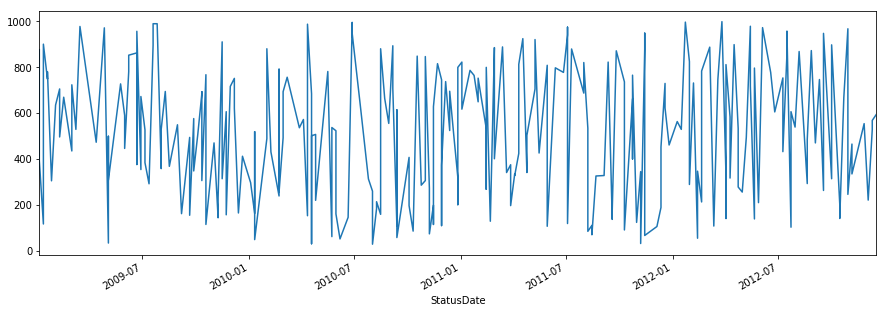

In [121]:
df['CustomerCount'].plot(figsize=(15,5))

In [122]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,877
2009-01-05,NY,1,394
2009-01-12,NY,1,118
2009-03-02,NY,1,436
2009-03-09,NY,1,530
2009-05-04,NY,1,500
2009-06-08,NY,1,781
2009-06-08,NY,1,853
2009-06-29,NY,1,378
